In [1]:
pairs = [
    "EURUSD","GBPUSD","USDJPY","USDCHF","EURJPY","USDCAD","AUDUSD","NZDUSD",
    "GBPJPY","EURGBP","AUDCAD","CADJPY","EURAUD","NZDJPY"
]

In [2]:
import pandas as pd
from utils.mt_5.data import get_currency_pair_data_

df = pd.DataFrame()

for pair in pairs:
    df = pd.concat([df, get_currency_pair_data_(pair)], axis=1)

df.columns = pairs
df.dropna(inplace=True)

df

,EURUSD,GBPUSD,USDJPY,USDCHF,EURJPY,USDCAD,AUDUSD,NZDUSD,GBPJPY,EURGBP,AUDCAD,CADJPY,EURAUD,NZDJPY
time,,,,,,,,,,,,,,
2021-06-02 03:00:00,1.22091,1.41703,109.590,0.89817,133.802,1.20396,0.77435,0.72316,155.298,0.86151,0.93234,91.009,1.57649,79.253
2021-06-03 03:00:00,1.21296,1.41075,110.285,0.90345,133.775,1.21087,0.76611,0.71452,155.589,0.85971,0.92771,91.064,1.58306,78.803
2021-06-04 03:00:00,1.21664,1.41577,109.503,0.89905,133.249,1.20786,0.77415,0.72094,155.067,0.85910,0.93499,90.637,1.57133,78.957
2021-06-06 03:00:00,1.21662,1.41637,109.613,0.89925,133.360,1.20749,0.77405,0.72078,155.259,0.85888,0.93471,90.762,1.57154,79.007
2021-06-07 03:00:00,1.21902,1.41752,109.268,0.89765,133.203,1.20859,0.77556,0.72236,154.894,0.85988,0.93739,90.394,1.57159,78.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-27 03:00:00,1.05618,1.26766,151.340,0.88229,159.834,1.40254,0.64963,0.58919,191.821,0.83295,0.91111,107.867,1.62542,89.137
2024-11-28 03:00:00,1.05596,1.26949,151.179,0.88238,159.631,1.40073,0.65066,0.58949,191.923,0.83161,0.91136,107.890,1.62261,89.090
2024-11-29 03:00:00,1.05769,1.27344,149.653,0.88093,158.221,1.39998,0.65132,0.59193,190.499,0.83041,0.91174,106.841,1.62307,88.567


# Time dependence

### view approximate `order`

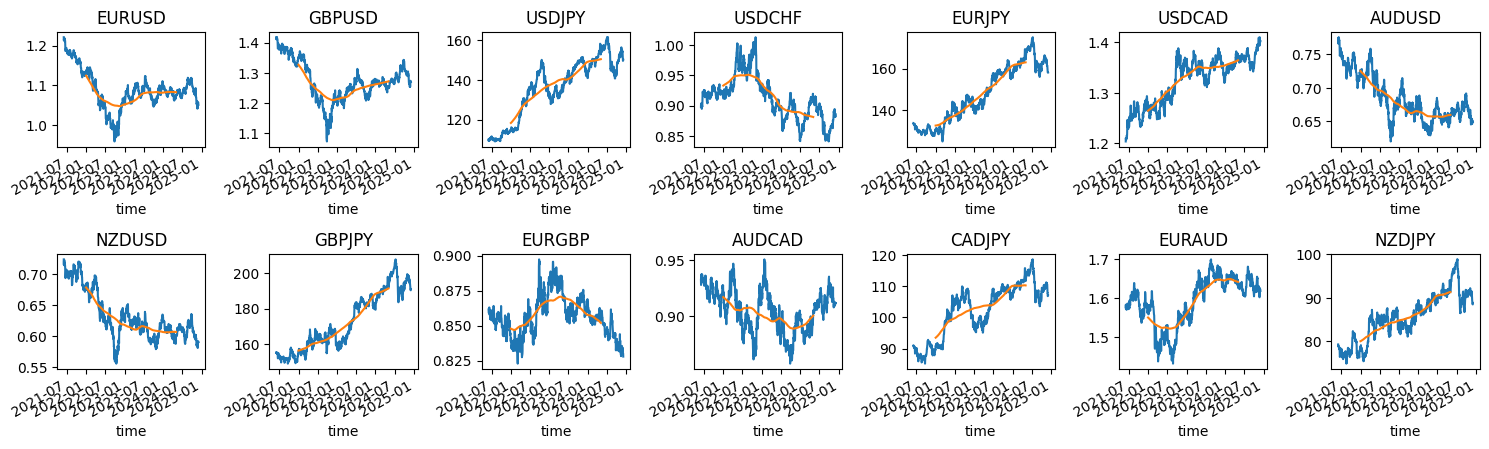

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(pairs)//2, len(pairs)//2, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    df[col].plot(ax=ax)
    ma = df[col].rolling(window=365, center=True).mean()
    ma.plot(ax=ax)
    ax.set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

### model trend

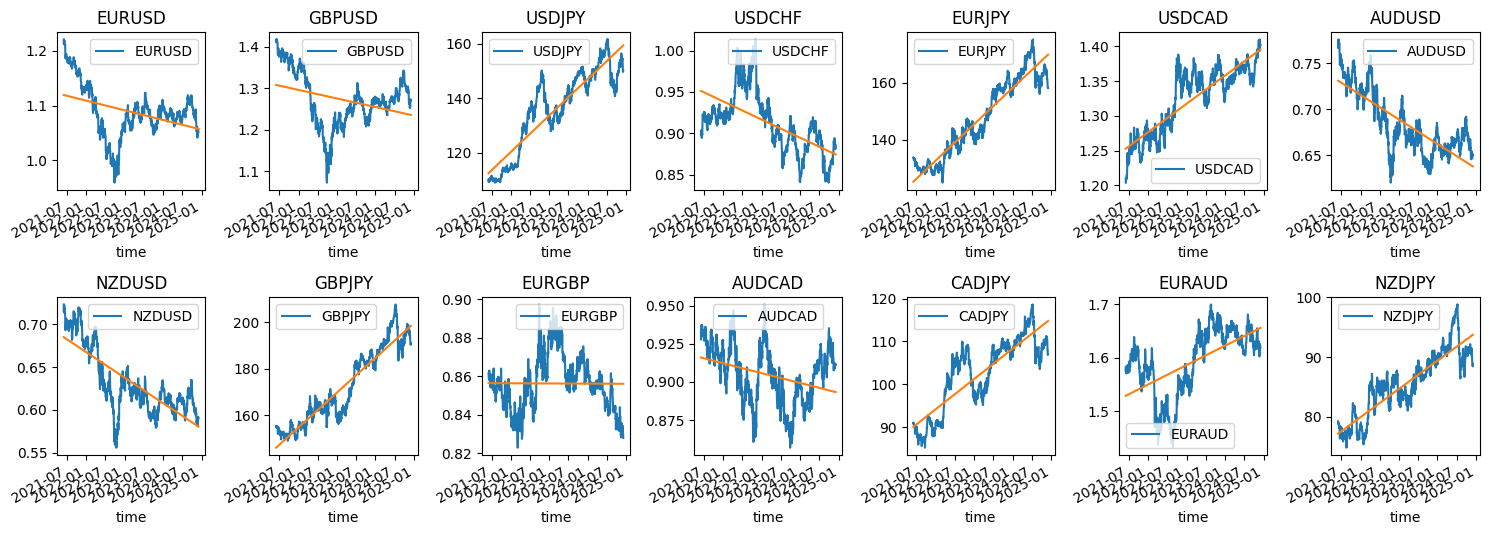

In [4]:
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

fig, axes = plt.subplots(len(pairs)//2, len(pairs)//2, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    dp = DeterministicProcess(index=df[col].index, order=1, constant=True, drop=True)
    X = dp.in_sample()
    y = df[col]

    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)
    y_pred = model.predict(X)

    ax = axes[i]
    df[col].plot(ax=ax)
    ax.plot(df[col].index, y_pred)
    ax.set_title(col)
    ax.legend()
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Definitely not time-dependent:

1) EURUSD *
2) GBPUSD *
3) EURGBP *
4) AUDCAD *
5) EURAUD *
-  USDCHF 
-  NZDUSD 
-  USDJPY 
-  AUDUSD 
-  CADJPY 


#### Room to investigate further:

1) USDCAD *
-  EURJPY
-  GBPJPY
-  NZDJPY


# Serial dependence

### get effective lags

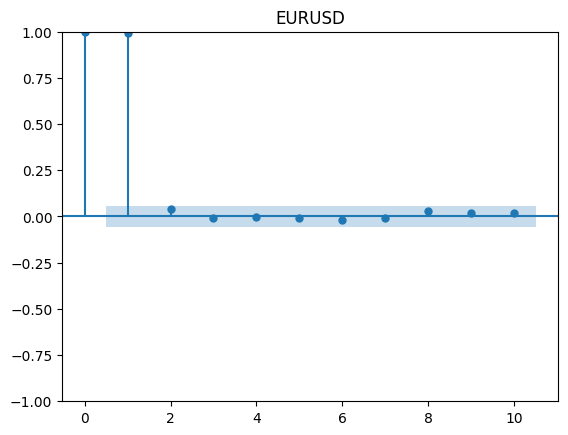

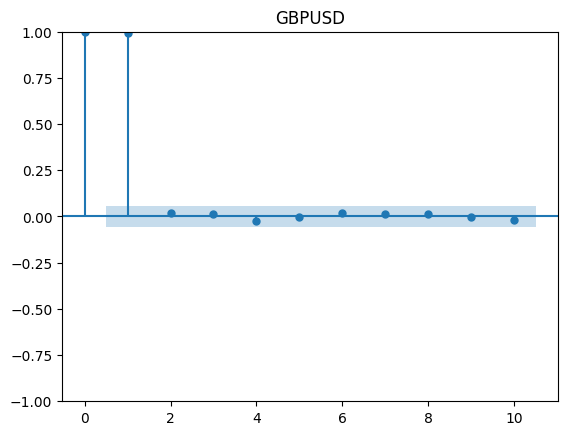

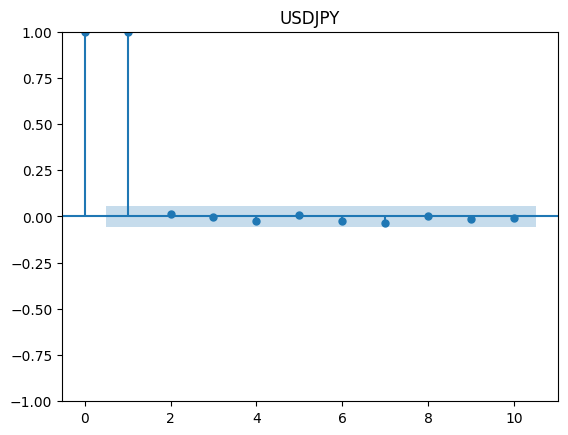

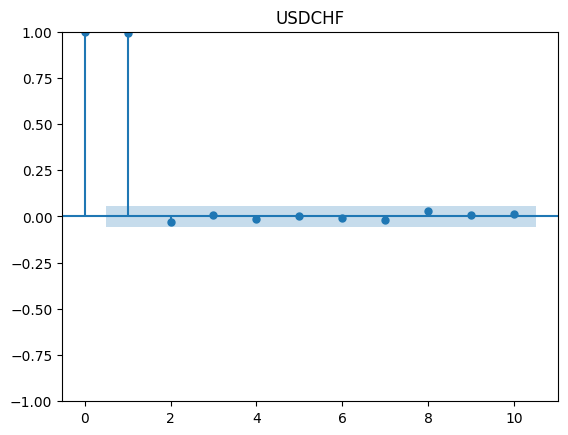

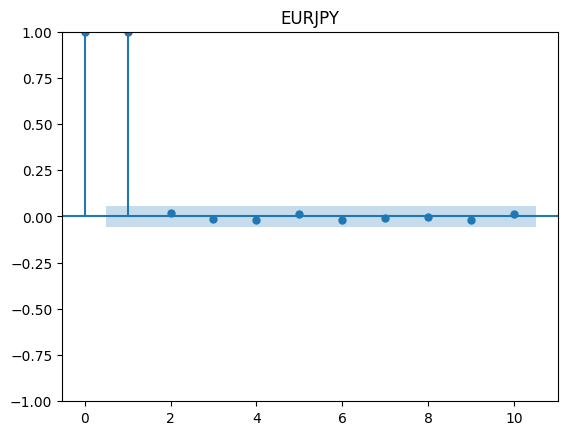

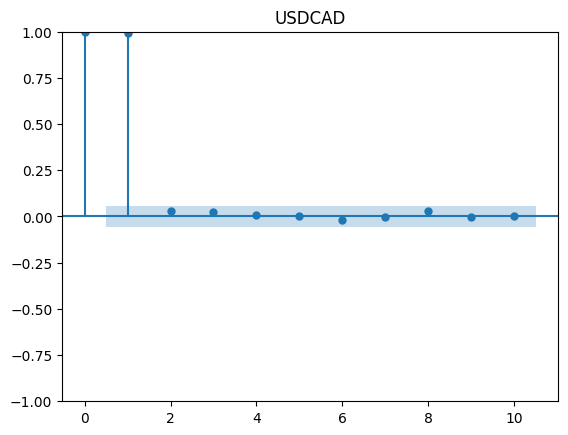

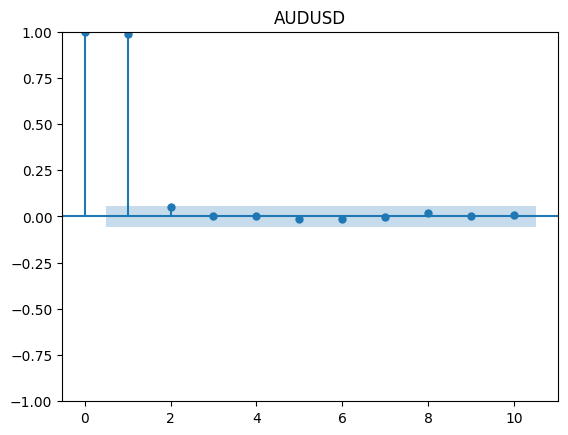

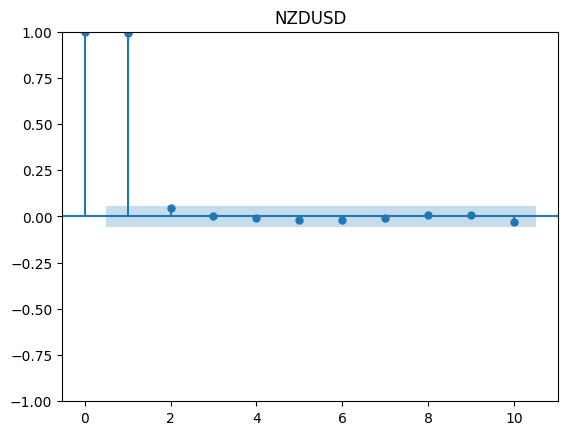

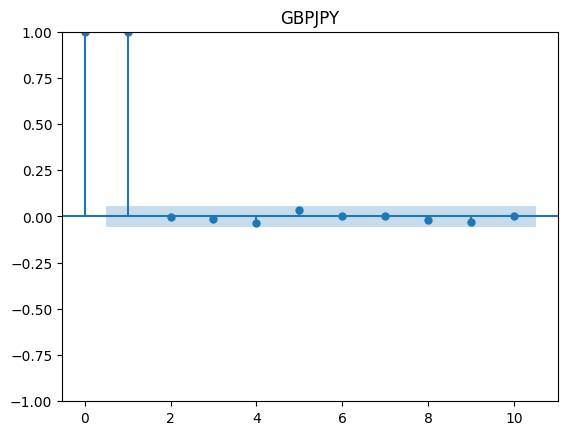

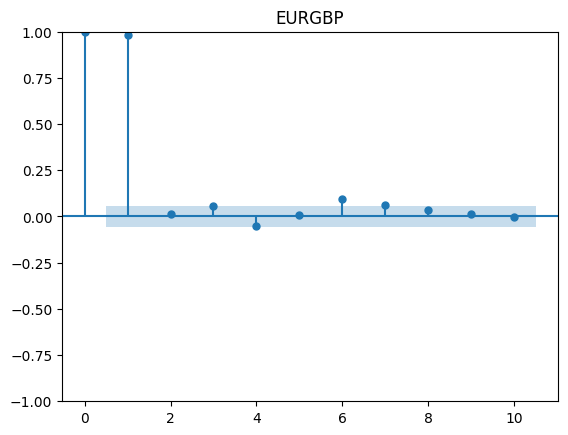

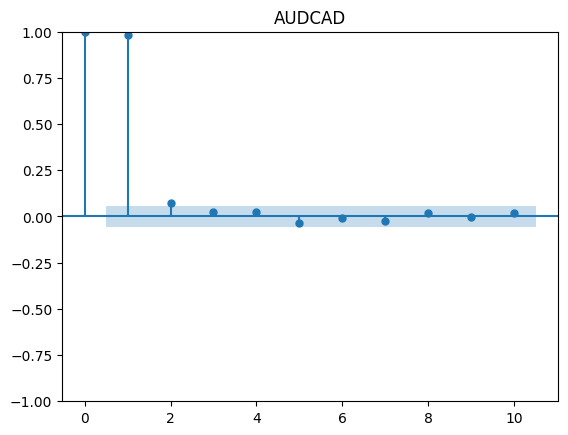

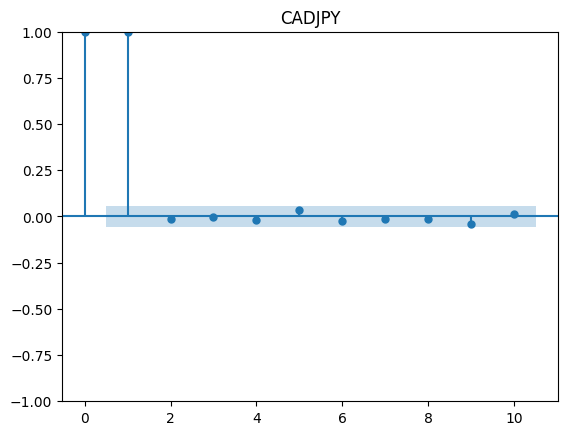

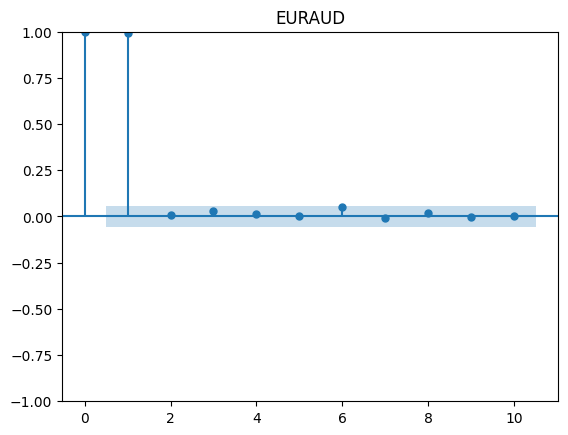

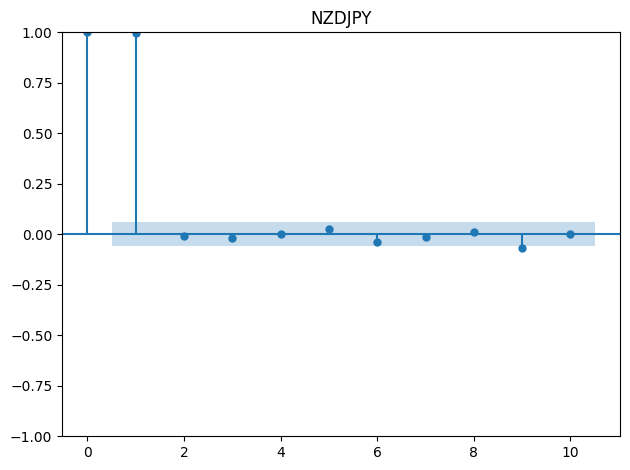

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf

for pair in pairs:
    plot_pacf(
        df[pair], 
        lags=10, # start with (approximately) high number
        title=pair
    )

plt.tight_layout()
plt.show()

### model cycles

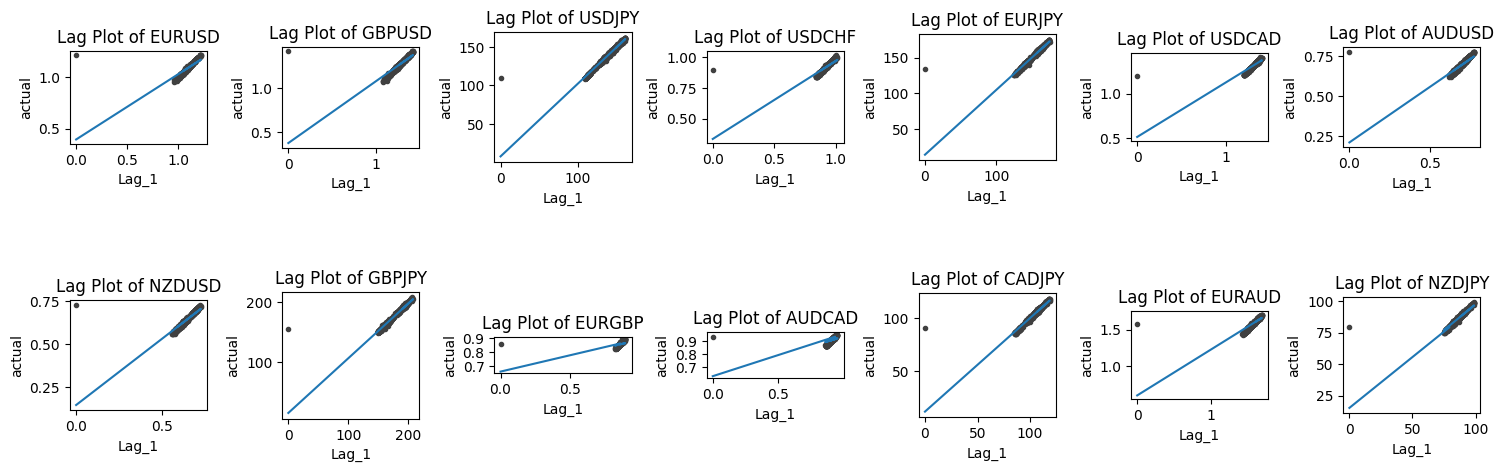

In [6]:
from utils.timeseries import make_lags

fig, axes = plt.subplots(len(pairs)//2, len(pairs)//2, figsize=(15, 18))
axes = axes.flatten()

for i, pair in enumerate(pairs):
    if pair == 'EURGBP':
        lags = 3
    elif pair in ['AUDCAD','NZDJPY']:
        lags = 2
    else:
        lags = 1

    X = make_lags(ts=df[pair], lags=lags, lead_time=1)
    y = df[pair]
    y, X = y.align(X, join='inner')

    model = LinearRegression()
    model.fit(X, y)
    y_pred = pd.Series(model.predict(X), index=X.index)

    ax = axes[i]
    
    ax.plot(X['y_lag_1'], y, '.', color='0.25')
    ax.plot(X['y_lag_1'], y_pred)
    ax.set_aspect('equal')
    ax.set_xlabel('Lag_1')
    ax.set_ylabel('actual')
    ax.set_title(f'Lag Plot of {pair}');

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Definitely not serially-dependent:

1) EURUSD *
2) GBPUSD *
3) EURGBP *
4) AUDCAD *
5) EURAUD * 
6) USDCAD *
7) USDCHF *
-  NZDUSD  
-  AUDUSD  


#### Room to investigate further:

1) GBPJPY *
2) EURJPY *
3) USDJPY *
- CADJPY 
- NZDJPY 